**About Data** <br>
The purpose of the dataset is predict the class of the Glass based upon the given features there’re around 9 features (Id number, RI, Na, Mg, Al, Si, K, Ca, Ba) In which all the columns except the Id columns plays an important role in determining the type of the Glass which also our target variable there are 7 types of glasses are in the description provided about the dataset but in a dataset of glasses we don’t have data about type 4 glass each type of glass has it’s own name but in a data the target variable in numbered from 1 to 7. So, based upon the available features we have to predict the target variable (type of glass).

**Machine Learning** <br>
Machine learning is the study of computer algorithms that allow computer programs to automatically improve through experience (Mitchell, 2011) <br>
Machine Learning (ML) is a sub field of Artificial Intelligence. ML learn through experience; it detects patterns in a data and make predictions.

**Machine learning types** <br>
There are four main type of Machine Learning:
1.	Supervised Learning 
2.	Unsupervised Leaning
3.	Semi-supervised Learning
4.	Reinforcement Learning
 <br> <br>
**Supervised Learning** <br>
	In Supervised learning we have a data which is already label, we train an algorithm on the labelled data. It is further divided into two categories: <br>
•	**Classification** <br>
	Classification is the process of predicting the outcome in the form of category for example the animal is cat or dog, patient have disease or not, team will win, lose or draw. <br>
•	**Regression** <br>
	In regression the outcome is the form of numerical (or continuous) like predicting house price, stock prediction. <br> <br>
**Unsupervised Learning** <br>
	In unsupervised Learning the data is not labelled. We train model unlabelled data by using following methods: <br>
•	**Clustering**  <br>
	It is the process of grouping the datapoints into similar groups. It separates the data into clusters. <br>
•	**Association Rules**
	It is the process of finding the relationship among the data and it’s descriptive not predictive. <br> <br>
**Semi supervised learning** <br>
Semi supervised learning is the combination of both supervised and unsupervised learning. It contains both labeled and unlabeled data. <br> <br>
**Reinforcement Learning** <br>
Reinforcement Learning is reward based learning. Model learn through its environment when model perform well it’s being rewarded and if it doesn’t perform well it’s being punished.


**Problem** <br>
Now we have the knowledge of different types of machine learning so we can easily tell that the particular type of the problem belongs to *Supervised ML* of machine learning and furthermore rely in the category of *Classification* as we have to classify the type of the glass by using independent features

# Importing dependencies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from keras.callbacks import Callback, EarlyStopping
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Reading data
The data is being read using .read_csv function of pandas which helps in reading the file from the directory which is provided to it. 

```
# header=None
```
tells that the files doesn't contain any header


In [2]:
df=pd.read_csv('/content/glass_data.csv',header=None)

# Assigning column names
The availble data is without the columns and we have the instructions about the dataset saperately so we have taken the names from that file. <br>
Instructions availbe in file are:
Data Dictionary of Data Set column description:

1.	Id number: 1 to 214
2.	RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminium
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
    - building_windows_float_processed
    - building_windows_non_float_processed
    - vehicle_windows_float_processed
    - vehicle_windows_non_float_processed (none in this database)
    - containers
    - tableware
    - headlamps


In [3]:
df.columns=['Id','refractive_index','Sodium','Magnesium','Aluminium','Silicon','Potassium','Calcium','Barium','Iron','Glass_type']

In [4]:
df.head()

,Id,refractive_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**why to remove id?** <br>
As we know that the column Id column is just for the representation of the row and it doesn’t convey and hold any meaning about the data so there’s no use of it we can drop it. So, Id column is dropped to avoid the curse of dimensionality because we don’t know may be the model give some importance to the Id column as well so dropping of it, is seems the better option

In [5]:
df.drop('Id',axis=1,inplace=True)

# Data Summary

Data summary is one of the useful operation for datadrames which gives us the *count, Mean, Standard Deviation* along with 5 number summary about the features of the data.<br>
The 5 number summary contain: <br>
1.   Min
2.   Q1
3.   Median
4.   Q3
5.   Max



In [6]:
df.describe()

,refractive_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Checking Null values in data
The Null values are the missing values in a dataset there can be multiple reason of the null value like not knowing the value at that time, computer fault or some other factor but before feeding the data to machine learning we have to impute the missing by using the appropriate method. <br>
Our dataset doesn't contain any null value so we don't have to adopt any imputing null values approach.

In [7]:
df.isna().sum()

refractive_index    0
Sodium              0
Magnesium           0
Aluminium           0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Glass_type          0
dtype: int64

# Checking Duplicates if any

**Data redundancy** <br>
It occurs when the same piece of information is placed at multple locations or occurance of same information several times.
<br>
TO avoid any data redundancy we have to check if there's presence of any duplicate data in the dataset by using


```
# df.duplicated()
```
By providing the results back to dataframe we exactly find out the which row in the dataset in duplicated




In [8]:
df[df.duplicated()]

,refractive_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Glass_type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


# Dropping the duplicates from data

**How to deal with duplicate records** <br>
There're mutilple ways to deal with the duplicate records but we have adopted the approach by keeping the last rows and droping the rows which occured first in the dataset.

In [9]:
df.drop_duplicates(keep='last',inplace=True)

# Concise summary

**.info** function of the dataframe provides the concise summary of the features that how many non-null values are there, Data type of each feature and memory usage.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  213 non-null    float64
 1   Sodium            213 non-null    float64
 2   Magnesium         213 non-null    float64
 3   Aluminium         213 non-null    float64
 4   Silicon           213 non-null    float64
 5   Potassium         213 non-null    float64
 6   Calcium           213 non-null    float64
 7   Barium            213 non-null    float64
 8   Iron              213 non-null    float64
 9   Glass_type        213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


# Pairplot

**Pairplot** shows the relations pairwise among feaures. Each of the features is plot along grid of axis,so each feature is plotted along the rows as well as along the column

<Figure size 576x576 with 0 Axes>

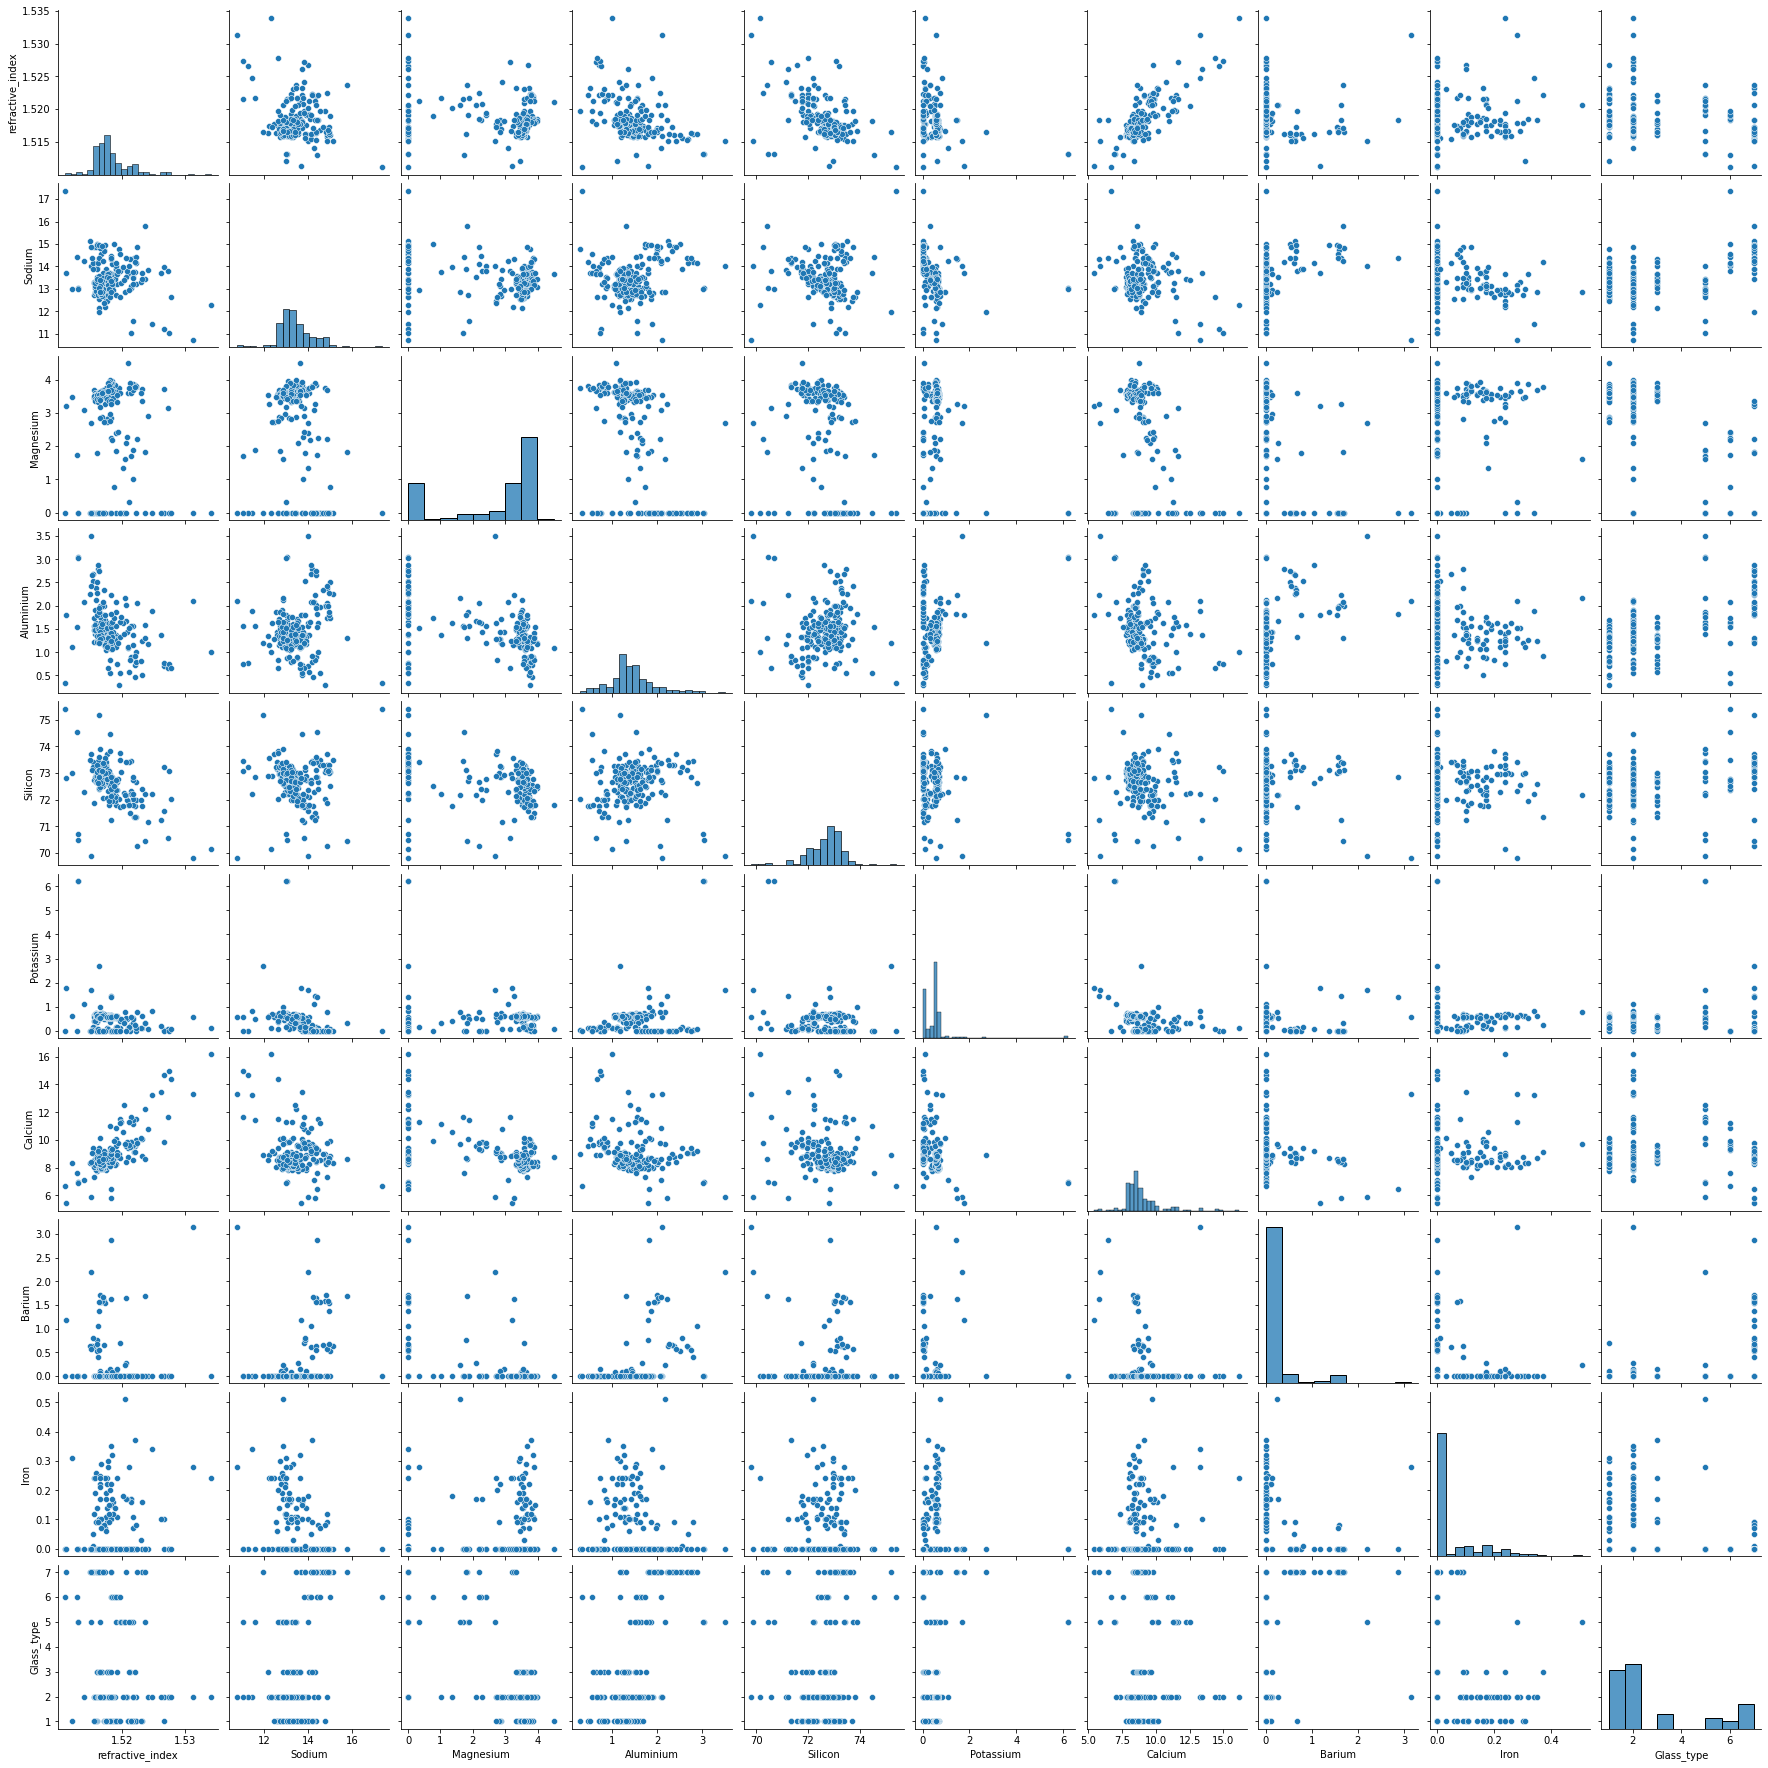

In [11]:
cols=df.columns
plt.figure(figsize=(8,8))
sns.pairplot(df[cols],palette='coolwarm');
plt.show()

# Correlation

Correlation measure the linear relationship among the quantitative variables. Which can be positively correlated, negatively correlated or no correaltion.


1.   Value close to 1 represent high positve correlation
2.   Value close to -1 represent high negative correaltion
3.   Value near 0 represent no correlation


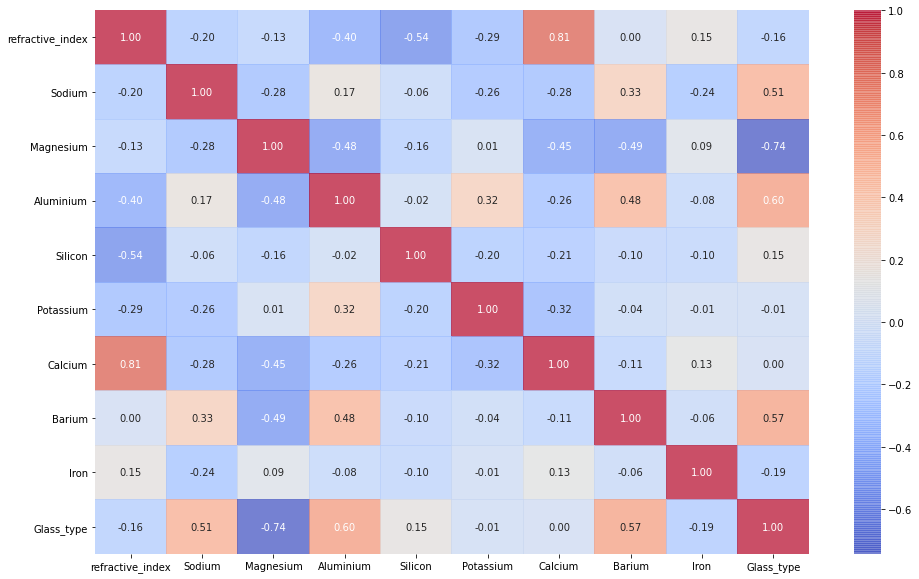

In [12]:
corr_mat=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_mat,annot=True,fmt='.2f',alpha = 0.7,   cmap= 'coolwarm')
plt.show()

# Distribution of Target variable

The distribution of the Glass type dataset which shows the distribution of each type of glass in a dataset that how many times the particular glass is occured in a dataset

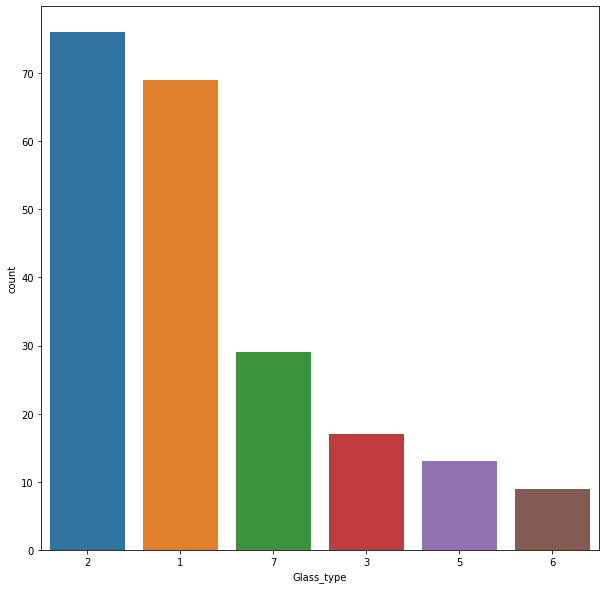

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x='Glass_type', data=df, order=df['Glass_type'].value_counts().index);

# Splitting Data 
we have seperated the features and target variables all the independent variables are stored in X variable where the dependent variable is stored in y variables. <br>
The independent variables are normalized by using the normalize function from keras.util API of keras. Normalization can also be performed by using the scikit-Learn api of standardScaler or MinMaxScaler or RobustScaler there're alot of methods to deal with this.

**why normalization?** <br>
Usually the normalization is performed to bring down all the features on the same scale. <br>
By brining down all the features to same scale benefit is that model treat each feature as same.

to_categorical converts the dependent variable into the class matrix.

In [14]:
X=df.drop('Glass_type',axis=1)
X=normalize(X)
y=df['Glass_type']

# Class balancing

As above from [Distribution of class](https://colab.research.google.com/drive/1aAOi2eL-WsyQ_vMxDw0gtOckTNUeJj1N#scrollTo=KoB-wT6QnwqL) we can see that the classes are imbalance so if we develop the model of unbalance dataset the model will bias towards the class containing most of the samples so dealing with imbalance classes will help in devloping fair model

In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

In [16]:
x_ros, y_ros = ros.fit_resample(X, y)

**splitting data** <br>
Now the data is balance so we split that balanced dataset into train test and validation data. By using the Scikit-Learn API train test split twice we split the data, 75% of data as training data and furtherly we split the 25% test data into the test and validation data. <br>
By printing the shape of the data we can see that 75% of data lies in training set and remaining 25% of data is further splitted half into testing and validation data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_ros,y_ros,test_size=0.25,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,stratify=y_test,test_size = 0.5,random_state=42)

In [18]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [19]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('y_test :',y_test.shape)
print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (342, 9)
y_train : (342, 8)
X_test : (57, 9)
y_test : (57, 8)
X_val : (57, 9)
y_val : (57, 8)


# Model

**Artificial Neural Network (ANN) and its types** <br>
Neural network defined by Dr. Robert Hecht-Nielsen as:
“...a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs.”
Neural network falls in a field of Deep Learning and scientist were inspired from human brain that how process and analyse the information, they are interconnected and make decisions from the output of previous layer.
Neural network is a circuit of neurons which are interconnected with each other. It contains input layers, output layers and hidden layers each layer is made up of neurons.
There are two types of ANN:
1.   Feedforward ANN
2.   Feed-Back ANN

-    **Feedforward ANN** <br>
	  In this type of ANN, flow of information is unidirectional and there are feedback loops among them. <br>
-    **Feed-Back ANN** <br>
	 In this type of ANN, information flow in both directions forward and backward, model learn from error and try to learn from error.

**Model development** <br>
As per the requirements we have to came up with the Neural Network which perform better on the particular problem well. The typical machine learning are easy in solving the numerical data and performing hyperparameter tunning as compared to neural network because in neural network we don’t have knowledge about the exact number of layers that how many layers will be the best option for the particular problem by adopting the trail and error approach we try to find the number of hidden layers and the number of the neurons in the layer.<br><br>
The model we used is compromised of three layers including the input and output  layer. Coming up with this architecture of the network wasn’t easy at all, multiple trails and errors are performed to finalize this architecture. Some of the architectures performed very well from this architecture however this performance was only limited to training set and didn’t performed well on test and validation data which is the sign of the *over-fitting* in which the model outperform on the training data but didn’t perform quiet well on testing data. Beside that some of the architectures we quite simpler than this network which even didn’t generalize the training data which is the case of the under-fitting. Both the under-fitting and over-fitting are considered good for the model because over-fitted model doesn’t have the ability to perform well in production because the model have generalized only training data and if the testing data slightly differ from training data, then model failed in making good predictions. Similarly, the underfitted model failed in making predictions because it haven’t generalized data well, which can be solved by training the model on more data or increasing the model complexity.<br><br>
By adopting the trial-and-error approach, trying out the different number of layers and then plotting the outcomes of the model we choose the model layers and the number of neurons when the model complexity increases the model get overfitted and when the model complexity decreases then model underfit so we tried multiple architectures of the model to came up with the model that neither overfit or underfit. The best possible model we found as per trail-and-error approach is the model with three layers the input layer with 40 number of neurons with activation function of Rectified Linear unit (Relu) which usually perform well among other activation functions.The model compromised on a single hidden layer with 20 number of neurons we tried dropout layers as well but model perform well without those layers, we added the output layer with 8 number of units because our class vector is compromised of 8 values.

In [21]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(40,input_shape=(9,),activation='relu'),

tf.keras.layers.Dense(20,activation='relu'),

tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 168       
Total params: 1,388
Trainable params: 1,388
Non-trainable params: 0
_________________________________________________________________


# Model summary

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 168       
Total params: 1,388
Trainable params: 1,388
Non-trainable params: 0
_________________________________________________________________


# stop loss

Before training the model on data we defined the early stopping approach, training the model again and again can be very time consuming when the epoch size is greater. So, adding the early stop was a better option to measure the validation loss, whenever the model validation loss stops improving over the 20 number of epochs which is set using the patience parameter the model will stop training. The model is fitted over the training data and validated at the same time on the validation set.

In [24]:
early_stop = EarlyStopping(
                monitor='val_loss', #Quantity to be monitored.
                mode='auto', #direction is automatically inferred from the name of the monitored quantity
                verbose=1, #verbosity mode.
                patience=20 #Number of epochs with no improvement after which training will be stopped
              )

# Model training

Now the model architecture is finalized and we have set the early stop as well. Now its time to train the model over the training data and validate it using validation data. The model would train for 1000 epochs if the validation loss is keep decreasing if the validation loss stop decreasing then model will stop the iterations after check further till 20 epochs.

In [25]:
history = model.fit(X_train, y_train,
                    epochs=1000,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=2,
                   )

Epoch 1/1000
11/11 - 1s - loss: 2.1082 - accuracy: 0.0585 - val_loss: 2.0582 - val_accuracy: 0.2105
Epoch 2/1000
11/11 - 0s - loss: 2.0517 - accuracy: 0.1520 - val_loss: 2.0057 - val_accuracy: 0.2105
Epoch 3/1000
11/11 - 0s - loss: 2.0080 - accuracy: 0.1520 - val_loss: 1.9686 - val_accuracy: 0.1930
Epoch 4/1000
11/11 - 0s - loss: 1.9779 - accuracy: 0.1579 - val_loss: 1.9440 - val_accuracy: 0.1930
Epoch 5/1000
11/11 - 0s - loss: 1.9550 - accuracy: 0.1579 - val_loss: 1.9208 - val_accuracy: 0.1930
Epoch 6/1000
11/11 - 0s - loss: 1.9351 - accuracy: 0.1579 - val_loss: 1.9022 - val_accuracy: 0.1930
Epoch 7/1000
11/11 - 0s - loss: 1.9173 - accuracy: 0.1579 - val_loss: 1.8857 - val_accuracy: 0.1930
Epoch 8/1000
11/11 - 0s - loss: 1.9008 - accuracy: 0.1579 - val_loss: 1.8718 - val_accuracy: 0.1930
Epoch 9/1000
11/11 - 0s - loss: 1.8854 - accuracy: 0.1579 - val_loss: 1.8590 - val_accuracy: 0.1930
Epoch 10/1000
11/11 - 0s - loss: 1.8716 - accuracy: 0.1579 - val_loss: 1.8485 - val_accuracy: 0.1930

**Overfitting vs underfitting** <br>
-   **Overfitting** <br>
	  Overfitting occurs when model generalize training data very well and perform poor on the test data.
-	  **Underfitting** <br>
   	Underfitting occur when model didn’t learn the training data well and make poor decisions.


# Accuracy plot of Model

The model is successfully trained and validated over the data now we can plot the accuracy of model over the train set and accuracy on validation dataset. The below graph shows the visual representation of both the accuracies along with legends at the lower right bottom

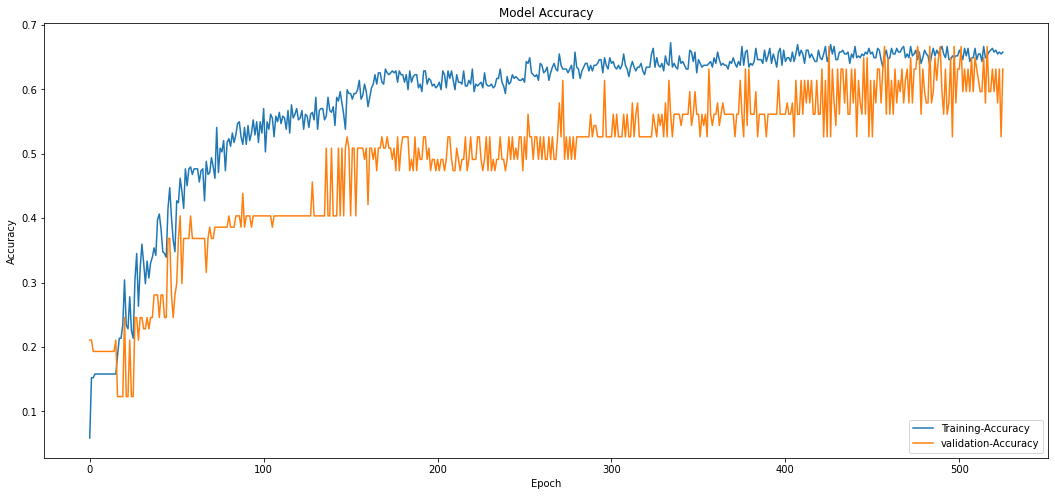

In [26]:
plt.figure(figsize=(18,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training-Accuracy', 'validation-Accuracy'], loc='lower right')
plt.show()

# Loss plot of model

The model loss representation can be seen in below graph along with legends

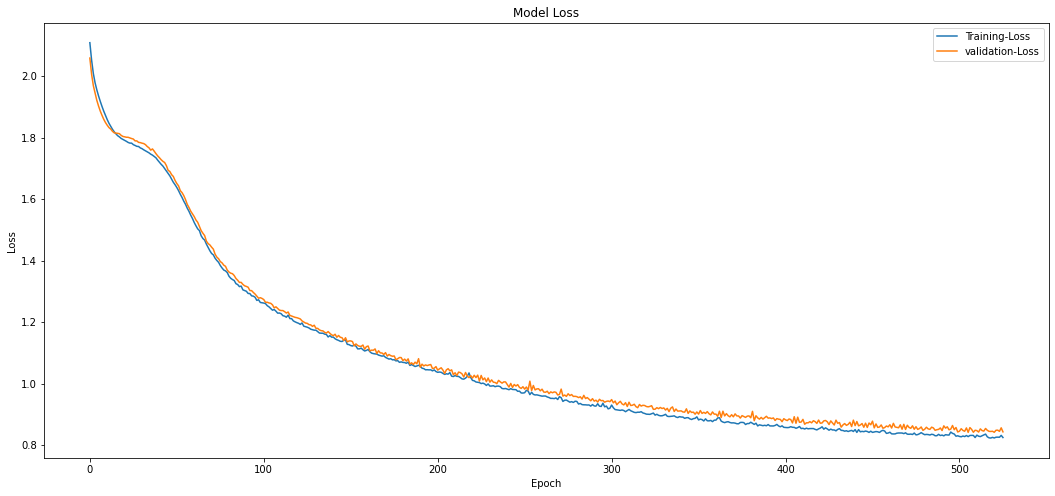

In [27]:
plt.figure(figsize=(18,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training-Loss', 'validation-Loss'], loc='upper right')
plt.show()

# Model Testing

Now we're done with all the things related to model training now it's time to test our model on the test data which haven't seen by the model to check how model performs over the unseen dataset. We can see that the model has achieved an accuracy of 63% of over the test data as well. The accuracy score isn't the good option for measuring the performance of model which is trained over imabalance dataset however we have balanced the dataset so we can consider this metric reliable one.

In [29]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.9576 - accuracy: 0.6316


[0.957605242729187, 0.6315789222717285]

# Classification Report

Classification report gives an idea about the class the model has predict correct and incorrect. The values in diagnols represent the classes that are predicted correclty whereas the values other than diagnols are incorrect predictions 

In [30]:
y_pred = model.predict(X_test) # model predicions of test data
y_pred_max = np.argmax(y_pred,axis=1) # choosing the max probability predicted by model
y_test_max = np.argmax(y_test,axis=1) # selecting max from y_test for comparison
confusion_matrix(y_test_max, y_pred_max)

array([[1, 2, 8, 0, 0, 0],
       [0, 6, 6, 0, 0, 0],
       [0, 1, 5, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 8, 2],
       [0, 0, 1, 1, 0, 9]])

# Conclusion

With Neural Network we achieved accuracy of about 65% percent which is acheived by applying trail-and-erros methods to find the best architecture of the Neural Network whihc neither overfit nor undefit. The accuracy can be improved by adding more data as Neural Networks are considered as best for large quanity of data. for smaller amount of dataset the traditional machine learning algorithms work better. The more data we have the more it helps the model in learning best parameters.

# References 
-   Mitchell, T 2011, “For pioneering contributions and leadership in the methods and applications of machine learning.” - National Academy of Engineering <br>
-   Caudill, M 1989 “Dr. Robert Hecht-Nielson as quoted in Neural Network Primer: Part I” - AI Expert, 
